MADHUNISHA.M

CODECLAUSE PROJECT2

SPEECH EMOTION RECOGNITION

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [2]:

import os

# Replace with the path to your dataset directory containing the audio files
dataset_directory = "C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data"

# List all files in the directory
file_list = os.listdir(dataset_directory)

# Loop through the files and remove the ".wav" extension
for file_name in file_list:
    if file_name.endswith(".wav"):
        new_file_name = file_name.replace(".wav", "")  # Remove the extension
        old_path = os.path.join(dataset_directory, file_name)
        new_path = os.path.join(dataset_directory, new_file_name)
        os.rename(old_path, new_path)

print("File extensions removed successfully.")


File extensions removed successfully.


In [3]:
base_path= "C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data"
paths=[]
labels=[]

for dirname,_,filenames in os.walk(base_path):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('-')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
            break
   
print('Dataset is succesfully Loaded')
      

Dataset is succesfully Loaded


In [4]:
paths[:5]

['C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
len(paths)

2800

In [6]:
labels[:5]

['angry.wav', 'angry.wav', 'angry.wav', 'angry.wav', 'angry.wav']

In [7]:
## create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']= labels
df.head()

,speech,label
0,C:/Users/Madhunisha/Downloads/archive (7)/TESS...,angry.wav
1,C:/Users/Madhunisha/Downloads/archive (7)/TESS...,angry.wav
2,C:/Users/Madhunisha/Downloads/archive (7)/TESS...,angry.wav
3,C:/Users/Madhunisha/Downloads/archive (7)/TESS...,angry.wav
4,C:/Users/Madhunisha/Downloads/archive (7)/TESS...,angry.wav


In [8]:
df['label'].value_counts()

angry.wav      400
disgust.wav    400
fear.wav       400
happy.wav      400
neutral.wav    400
ps.wav         400
sad.wav        400
Name: label, dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: xlabel='label', ylabel='count'>

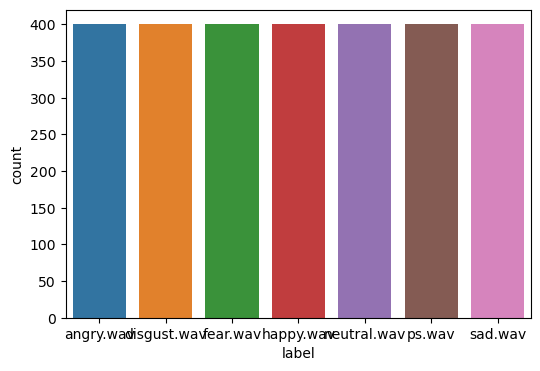

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='label')

In [11]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

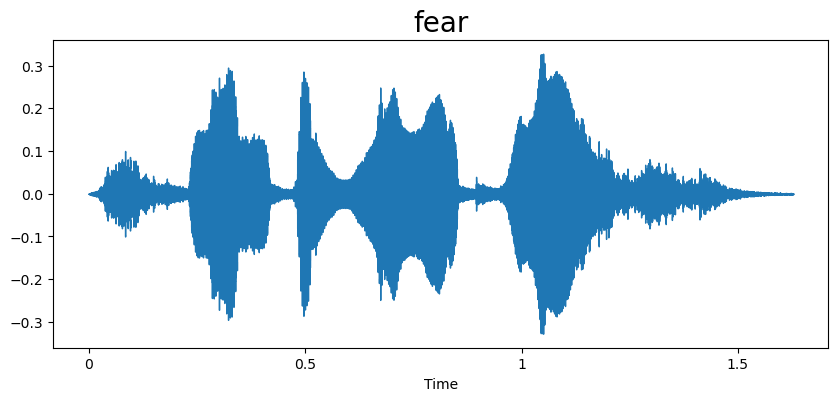

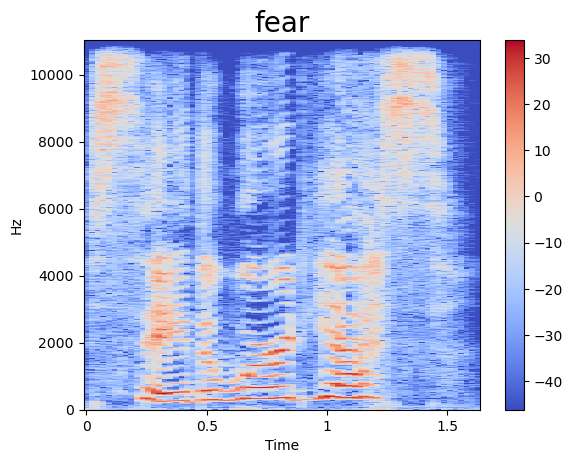

In [12]:
emotion='fear'
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_yes_fear.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

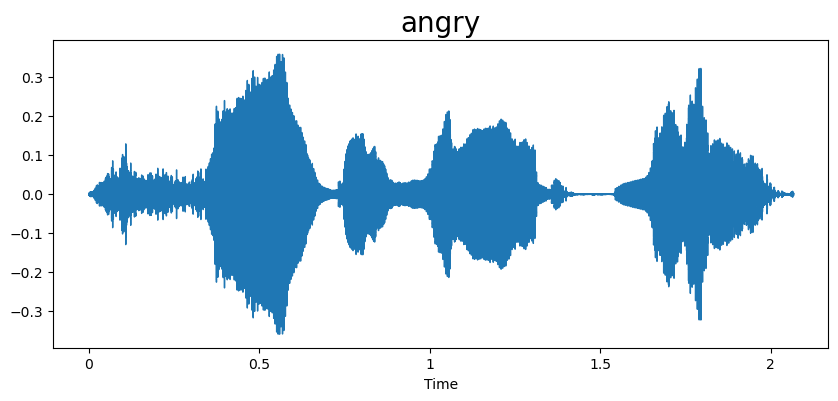

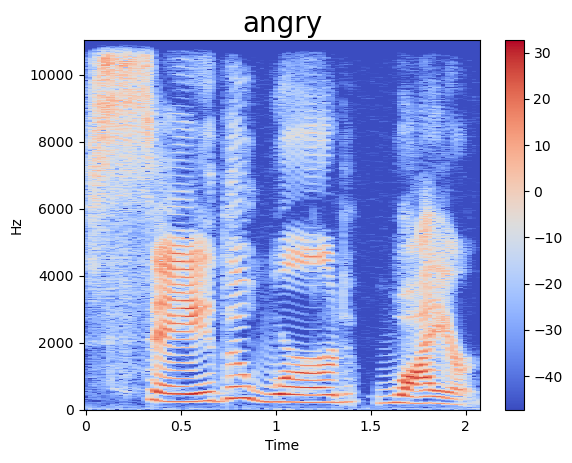

In [13]:
emotion="angry"
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_wire_angry.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

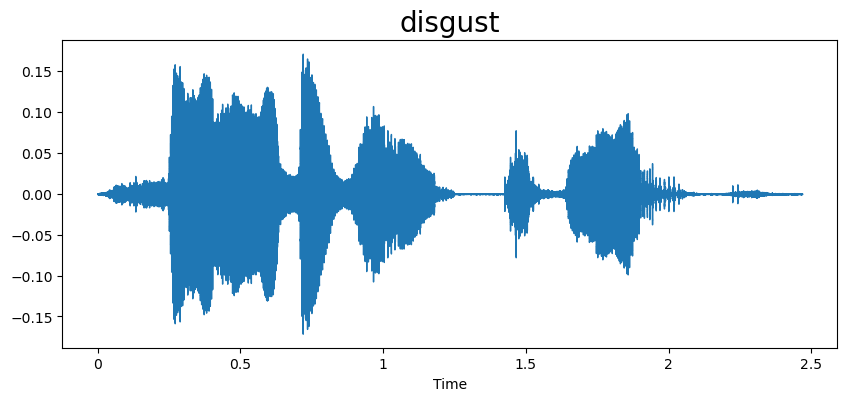

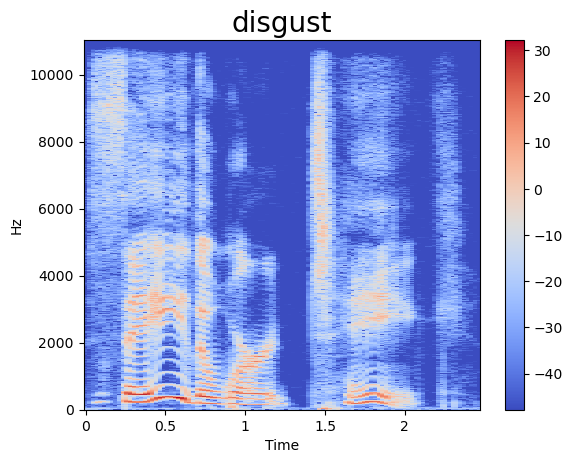

In [14]:
emotion="disgust"
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/YAF_disgust/YAF_take_disgust.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


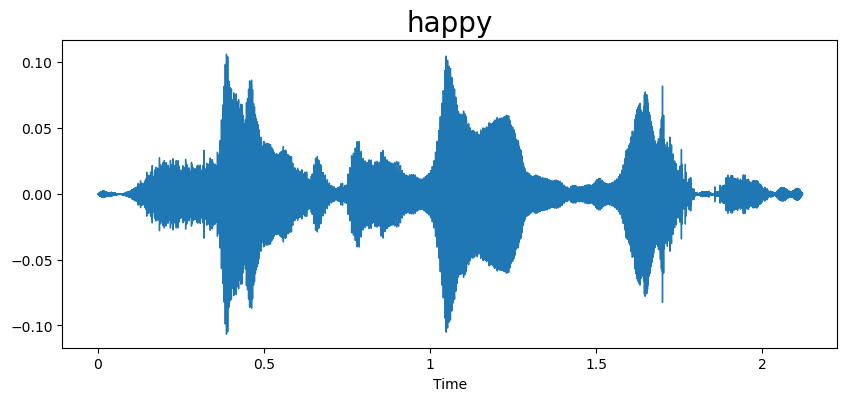

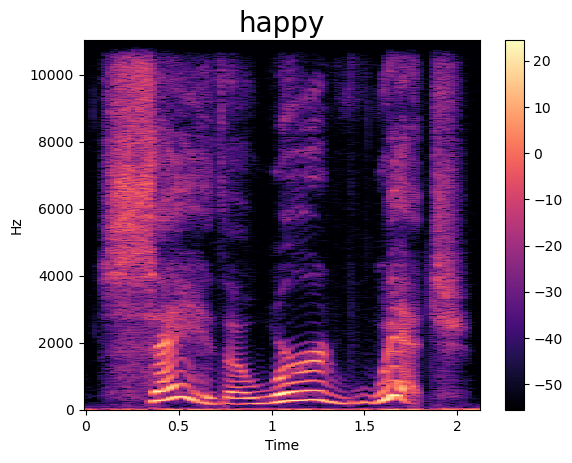

In [15]:
emotion="happy"
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/OAF_happy/OAF_which_happy.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


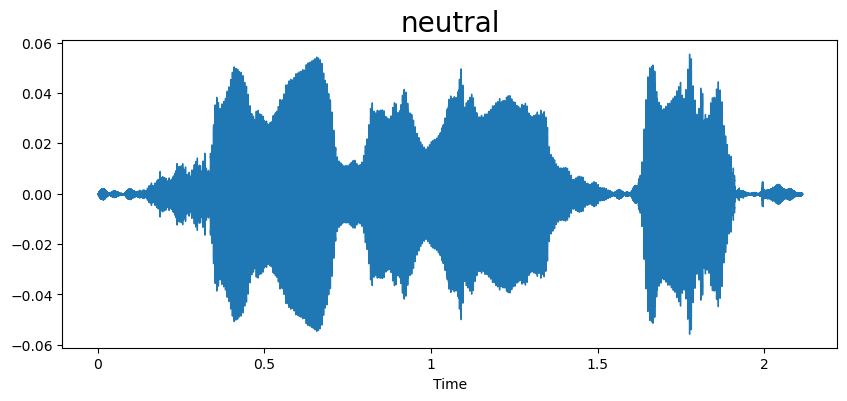

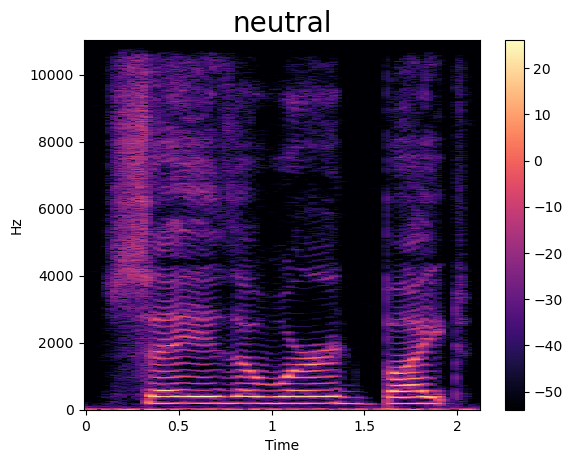

In [16]:

emotion="neutral"
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/OAF_neutral/OA_bite_neutral.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

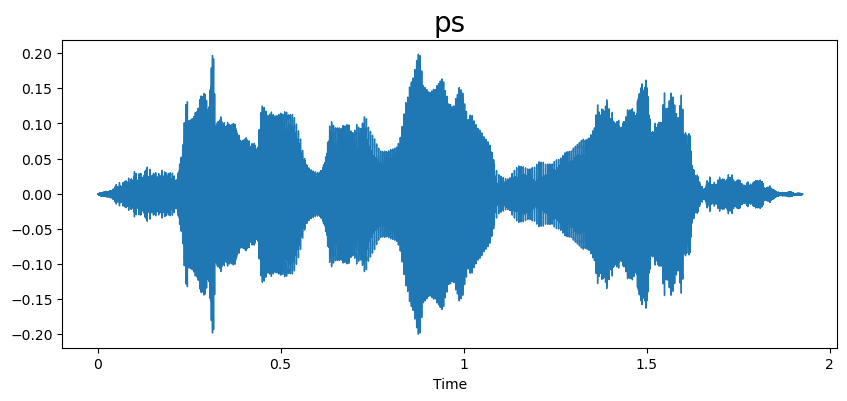

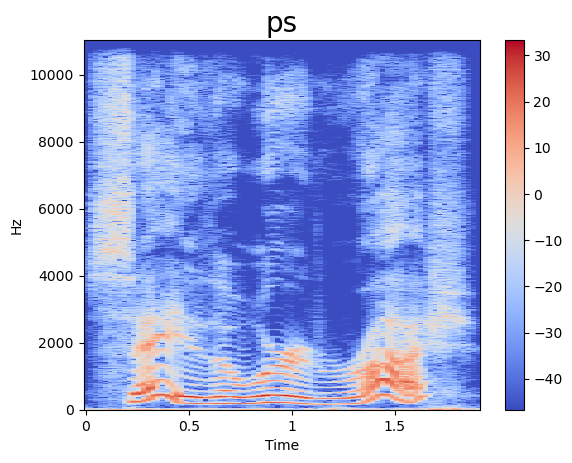

In [17]:
emotion="ps"
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_rush_ps.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

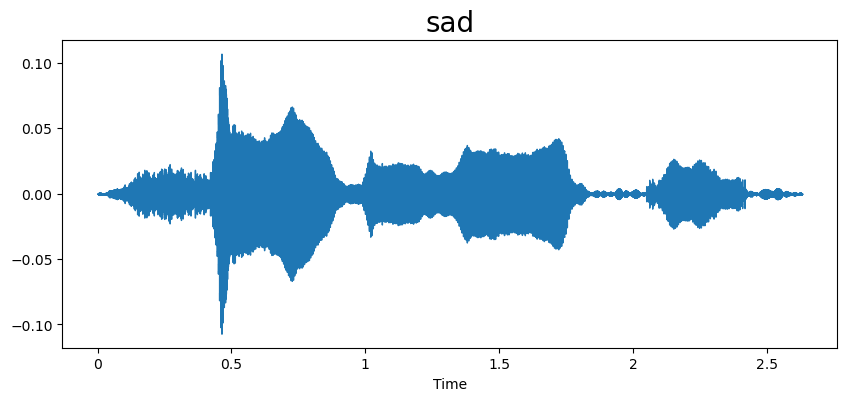

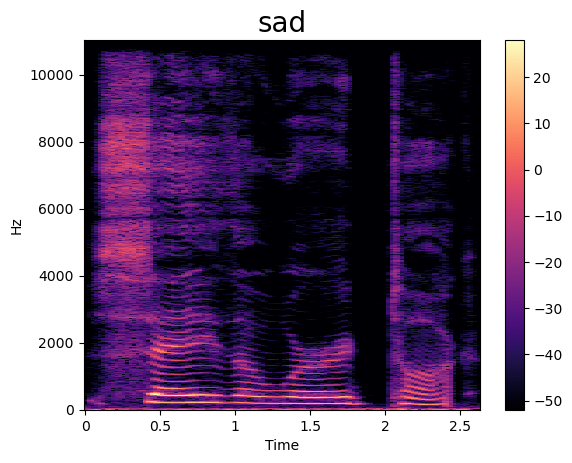

In [18]:
emotion="sad"
path="C:/Users/Madhunisha/Downloads/archive (7)/TESS Toronto emotional speech set data/OAF_Sad/OAF_talk_sad.wav"
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

FEATURE EXTRACTION

In [20]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc   

In [21]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551281e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [22]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [23]:
X_mfcc = [x for x in X_mfcc]
x = np.array(X_mfcc)
x.shape

(2800, 40)

In [24]:
# input split
X=np.expand_dims(X_mfcc,-1)
X.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [26]:
y=y.toarray()

In [27]:
y.shape

(2800, 7)

Create the LSTM model

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [30]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    ])
    
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

Train the model

In [31]:

history = model.fit(X_train,y_train,validation_split = 0.3, epochs = 55, batch_size = 64)

Epoch 1/55
22/22 [==============================] - 3s 69ms/step - loss: 1.6130 - accuracy: 0.4366 - val_loss: 1.1314 - val_accuracy: 0.5935
Epoch 2/55
22/22 [==============================] - 1s 42ms/step - loss: 0.9542 - accuracy: 0.6312 - val_loss: 0.6712 - val_accuracy: 0.7857
Epoch 3/55
22/22 [==============================] - 1s 42ms/step - loss: 0.6778 - accuracy: 0.7208 - val_loss: 0.4144 - val_accuracy: 0.8776
Epoch 4/55
22/22 [==============================] - 1s 56ms/step - loss: 0.4170 - accuracy: 0.8579 - val_loss: 0.2121 - val_accuracy: 0.9320
Epoch 5/55
22/22 [==============================] - 1s 62ms/step - loss: 0.3185 - accuracy: 0.8885 - val_loss: 0.2110 - val_accuracy: 0.9252
Epoch 6/55
22/22 [==============================] - 1s 48ms/step - loss: 0.2391 - accuracy: 0.9213 - val_loss: 0.1858 - val_accuracy: 0.9405
Epoch 7/55
22/22 [==============================] - 1s 58ms/step - loss: 0.2198 - accuracy: 0.9380 - val_loss: 0.1131 - val_accuracy: 0.9592
Epoch 8/55
22

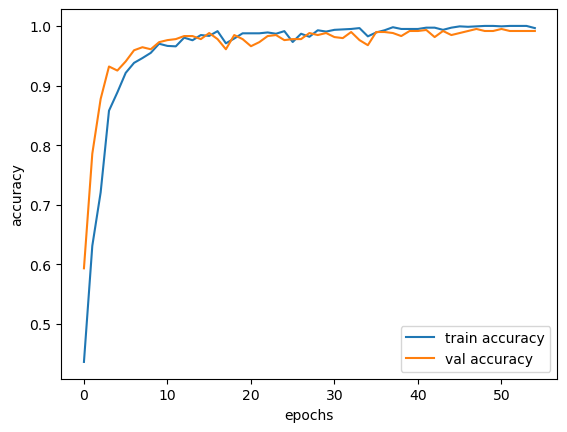

In [32]:
epochs=list(range(55))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


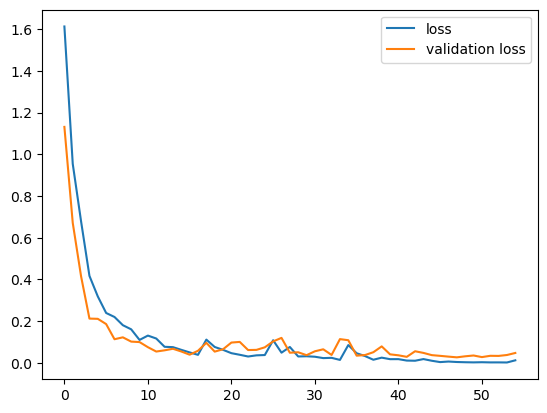

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss,label = 'loss')
plt.plot(epochs,val_loss,label = 'validation loss')
plt.legend()
plt.show()

In [34]:
model.evaluate(X_train,y_train)

62/62 [==============================] - 0s 7ms/step - loss: 0.0146 - accuracy: 0.9974


[0.014584734104573727, 0.9974489808082581]

In [35]:
pred = model.predict(X_test)
pred

27/27 [==============================] - 1s 7ms/step


array([[1.5885176e-14, 1.3577910e-06, 3.4369890e-08, ..., 1.0084332e-15,
        9.9999785e-01, 1.6037383e-08],
       [3.0294316e-09, 5.5608780e-07, 2.6728484e-08, ..., 4.3717491e-14,
        1.8182618e-05, 8.5327152e-08],
       [7.0555957e-09, 7.3506948e-07, 1.0110666e-08, ..., 4.2314391e-14,
        4.3153054e-06, 8.4135145e-08],
       ...,
       [1.8902038e-09, 1.6277649e-05, 6.6078704e-10, ..., 5.5554828e-08,
        6.7245622e-07, 9.9998188e-01],
       [4.1083784e-13, 2.8316799e-06, 1.4609827e-07, ..., 4.6798204e-14,
        9.9999487e-01, 1.6548347e-07],
       [2.1511930e-07, 1.4591615e-07, 9.9999869e-01, ..., 6.9393900e-07,
        8.6643617e-08, 2.0295596e-09]], dtype=float32)

In [36]:
acc = model.evaluate(X_test,y_test)
acc

27/27 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 0.9893


[0.059088919311761856, 0.9892857074737549]